## 📌 Objective
We want to segment mall customers into meaningful groups using **Unsupervised Learning**.  
This helps businesses understand **budget buyers, premium spenders, and frequent shoppers** → useful for marketing & personalization. 

### ✅ Insights from Clusters
- **Cluster 0** → Low income, low spending → "Budget-Conscious Customers"
- **Cluster 1** → High income, high spending → "Premium Buyers"
- **Cluster 2** → Medium income, high spending → "Young/Enthusiastic Shoppers"
- **Cluster 3** → High income, low spending → "Cautious/Practical Buyers"
- **Cluster 4** → Average income, moderate spending → "Middle Segment"

## 🚀 Business Use Case
- Tailored promotions:
  - Premium buyers → Loyalty rewards
  - Budget-conscious → Discounts/coupons
  - Cautious buyers → High-value offers


### Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Step 2: Load Dataset

In [ ]:
# If you have mall_customers.csv, place it in the same folder.
# else download from https://www.kaggle.com/datasets/shwetabh123/mall-customers
path = r"Data\Mall_Customers.csv"

df = pd.read_csv(path)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 3: Data Exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


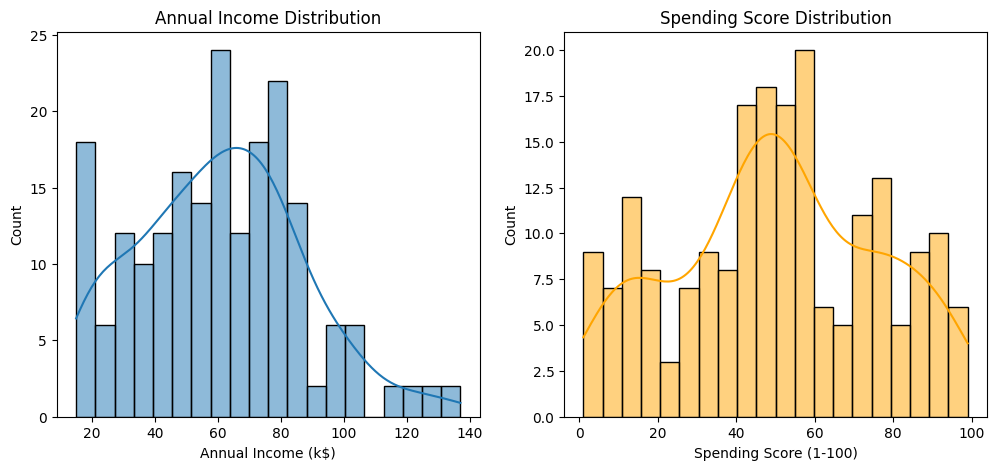

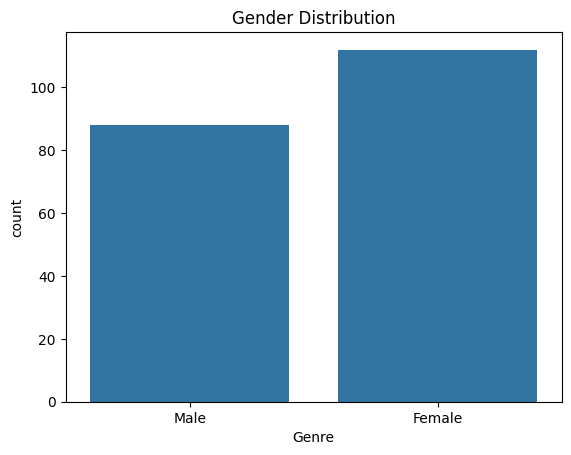

In [8]:
df.info()
df.describe()

# Distribution of features
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="orange")
plt.title("Spending Score Distribution")
plt.show()

# Gender balance
sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()


### Step 4: Preprocessing


In [9]:
# We'll use Annual Income & Spending Score for clustering (classic choice)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Step 5: Optimal K using Elbow & Silhouette


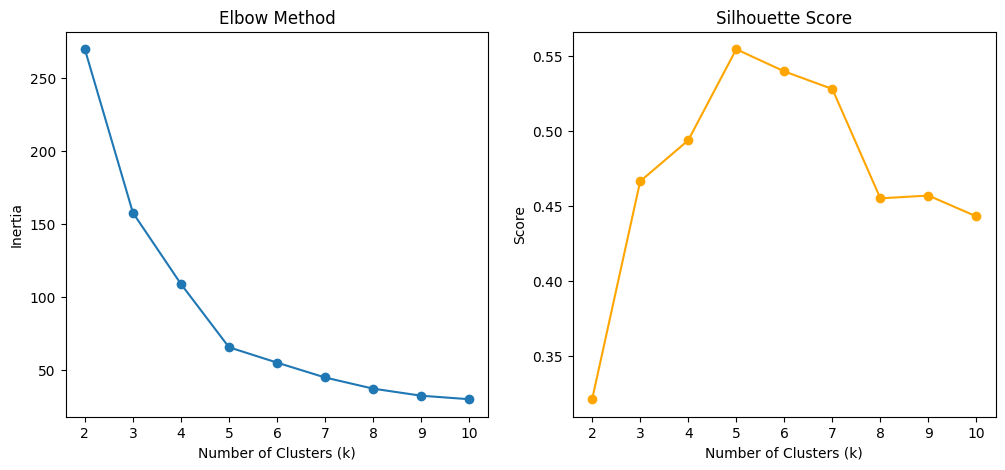

In [10]:
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Plot Silhouette
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color="orange")
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.show()


### Step 6: Apply K-Means


In [11]:
optimal_k = 5  # From Elbow & Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Step 7: Visualization (2D with PCA)


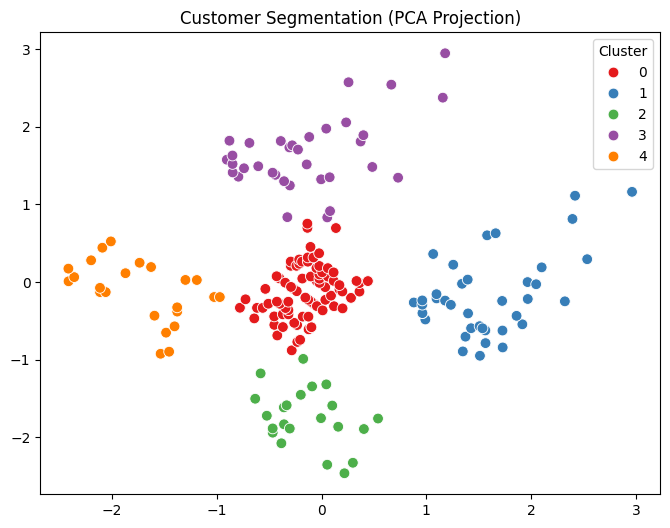

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1", s=60)
plt.title("Customer Segmentation (PCA Projection)")
plt.show()


### Step 7: Visualization (2D with PCA)


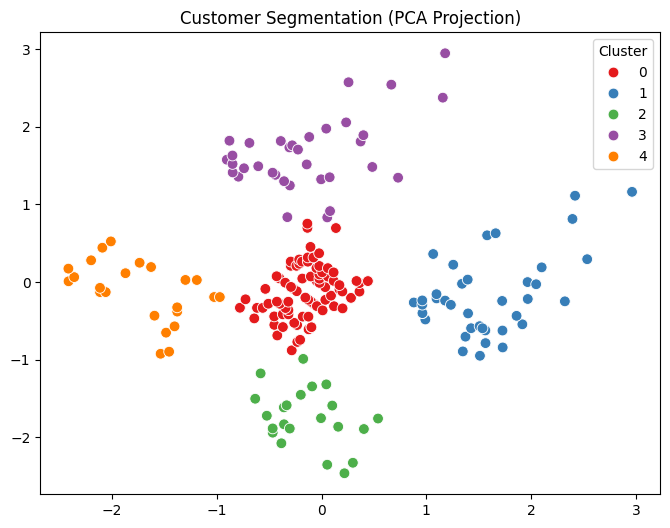

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1", s=60)
plt.title("Customer Segmentation (PCA Projection)")
plt.show()
